In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
df = pd.read_csv('/Users/amitmishra/Downloads/Datasets/credit-risk/cr_loan2.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 1 = default, 0 = non-default

In [4]:
pd.crosstab(df['person_home_ownership'], df['loan_status'], values = df['loan_int_rate'] , aggfunc= 'mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [5]:
pd.crosstab(df['loan_intent'], df['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


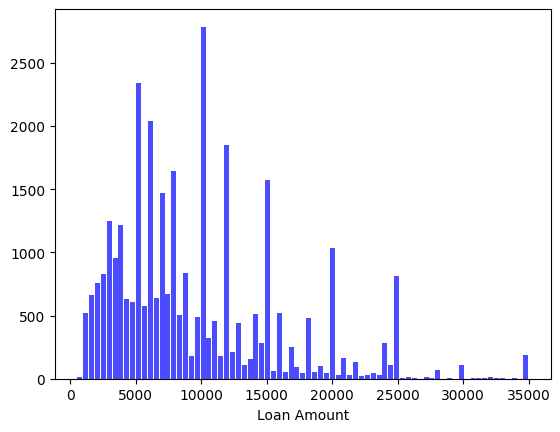

In [6]:
#Visualizaing distribution of loan amounts

plt.hist(df['loan_amnt'], bins = 'auto', color = 'blue', alpha = 0.7, rwidth = 0.85)
plt.xlabel('Loan Amount')
plt.show()

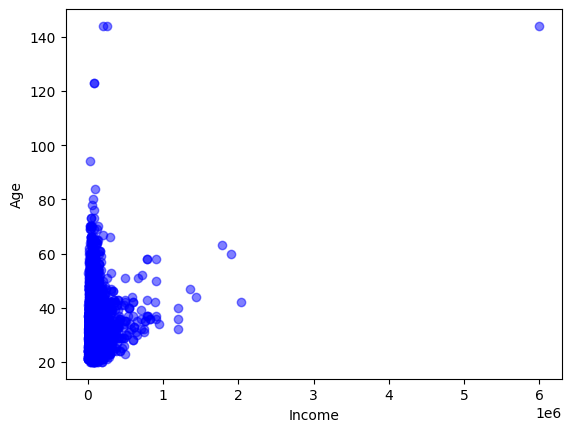

In [7]:
plt.scatter(df['person_income'], df['person_age'], c = 'blue', alpha = 0.5)
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

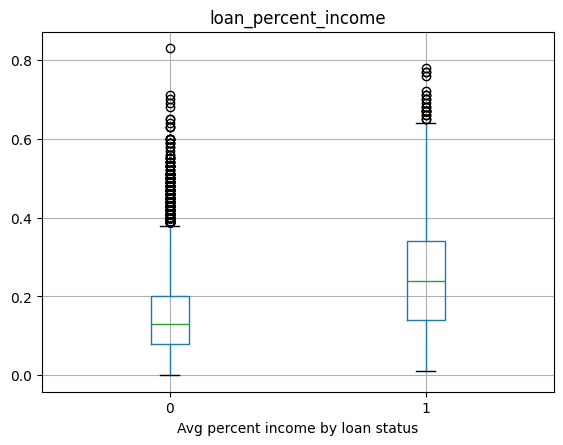

In [8]:
#Box plot of percentage income by loan status

df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.xlabel('Avg percent income by loan status')
plt.suptitle('')
plt.show()

### The plot clearly shows that defaulting loans (1) have higher loan_percent_income values on average than non-defaulting loans (0). 
### This means people who defaulted were typically using a larger percentage of their income to pay their loans compared to those who didn't default.
#### The median for group 0 (non-default) is around 0.13 (13% of income)
#### The median for group 1 (default) is around 0.23 (23% of income)

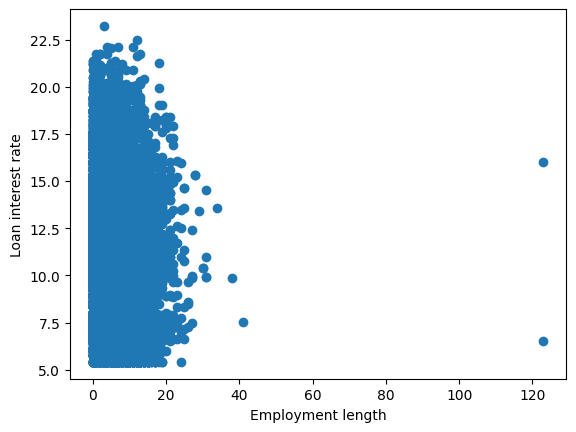

In [9]:
#Detecting and removing outliers

plt.scatter(x = df['person_emp_length'], y= df['loan_int_rate'])
plt.xlabel("Employment length")
plt.ylabel("Loan interest rate")
plt.show()


In [10]:
indices = df[df['person_emp_length'] >=60].index

In [11]:
df.drop(indices, inplace = True)

In [12]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


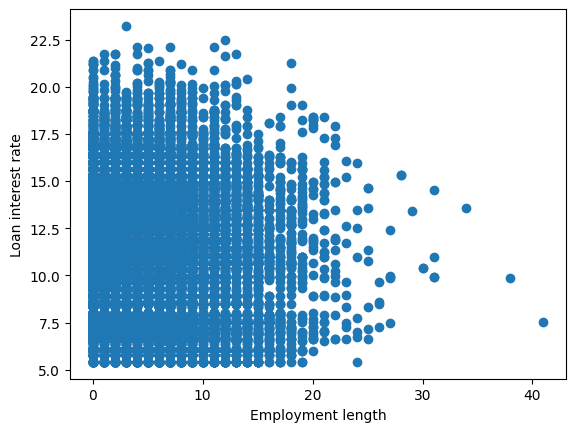

In [13]:
plt.scatter(x = df['person_emp_length'], y= df['loan_int_rate'])
plt.xlabel("Employment length")
plt.ylabel("Loan interest rate")
plt.show()


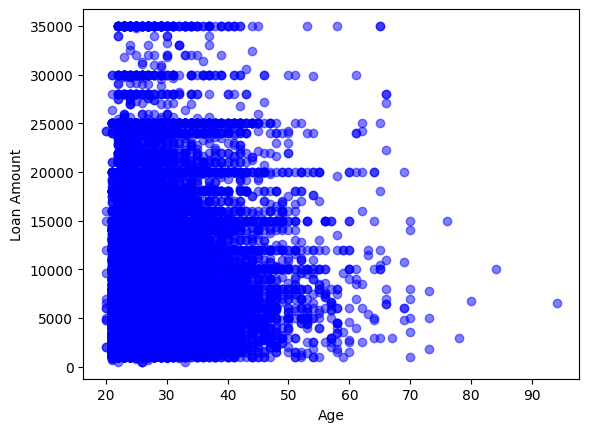

In [21]:
plt.scatter(df['person_age'], df['loan_amnt'], c = 'blue', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()

In [16]:
indices = df[df['person_age'] >= 100].index

In [17]:
df.drop(indices, inplace = True)

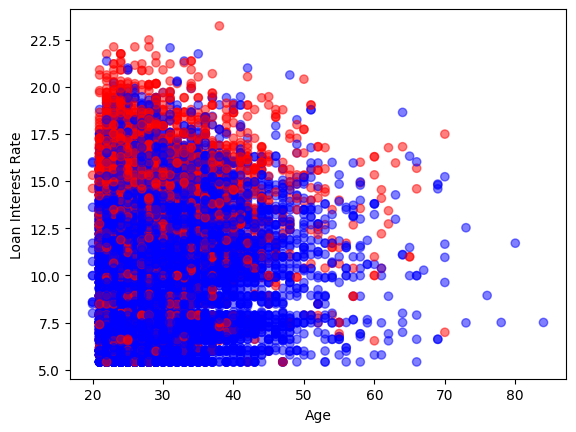

In [28]:
colors = ['blue','red']
plt.scatter(df['person_age'], df['loan_int_rate'], c = df['loan_status'],cmap = matplotlib.colors.ListedColormap(colors), alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Loan Interest Rate')
plt.show()

### Checking null values and performing imputation

In [43]:
print(df.columns[df.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


In [45]:
print(df[df['person_emp_length'].isnull()].head())

     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
105        

In [46]:
# Impute the null values with the median value for all employment lengths

df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace = True)

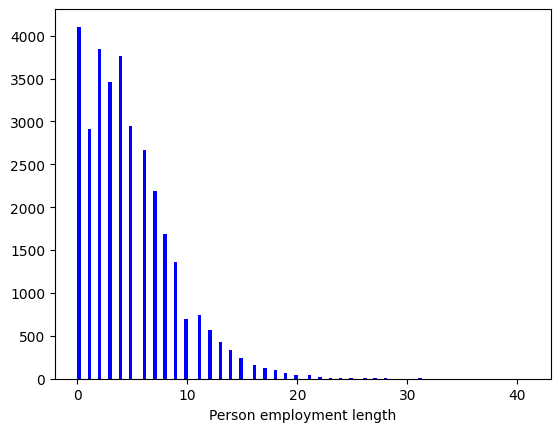

In [48]:
n, bins, patches = plt.hist(df['person_emp_length'], bins = 'auto', color = 'blue')
plt.xlabel('Person employment length')
plt.show()

In [49]:
#Remove missing data for loan_int_rate column

In [59]:
print(df['loan_int_rate'].isnull().sum())

3115


In [60]:
indices = df[df['loan_int_rate'].isnull()].index

In [61]:
df_clean = df.drop(indices, inplace = False)

In [63]:
print(df_clean.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [64]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16442
MORTGAGE    13441
OWN          2584
OTHER         107
Name: count, dtype: int64

### Calculating probability of default using Logistic Regression